# [F-22] 딥네트워크, 서로 뭐가 다른 거죠?

## 1. ImageNet Challenge

### 🌿 이미지넷(ImageNet)
- 2010년 ILSVRC2010(이미지 인식 경진대회 - 일종의 컴비 올림픽)을 시작으로 대량의 이미지 데이터를 포함하는 데이터셋
- 1만 개가 넘는 카테고리에 대해 100만 장 규모의 이미지를 가지고 있다.
- 모으는 것 뿐만이 아닌 챌린지를 위한 데이터셋으로 제공되었는데, 그중 가장 유명한 태스크가 바로 **이미지 분류기(Image Classification Task)**
    - 2010년 이 테스크에는 11개의 팀이 참가했는데, 그 중 NEC-UIUC팀이 **Descriptor Coding**과 **SVM**을 결합한 방식을 사용해 오류율 28%로 1등을 달성함
    - 2011년 Xerox Research Centre Europe이 오류을 26%로 1등을 달성함
    - 2012년 Geoffrey Hinton 교수가 이끄는 토론토 대학의 SuperVision 팀이 오류율 16%로 1등을 달성함

> ImageNet Pretrained Model의 2가지 Accuracy (이미지 분류 성능을 측정하기 위한)
> - `Top-1 Accuracy`: 예측값이 일반적으로 생각하는 정답을 맞춘 정확도
> - `Top-5 Accuracy`: 예측한 확률이 높은 순서로 5개 내에서 정답이 있을 경우 맞춘 것으로 간주한 정확도

## 2. 딥네트워크의 시작
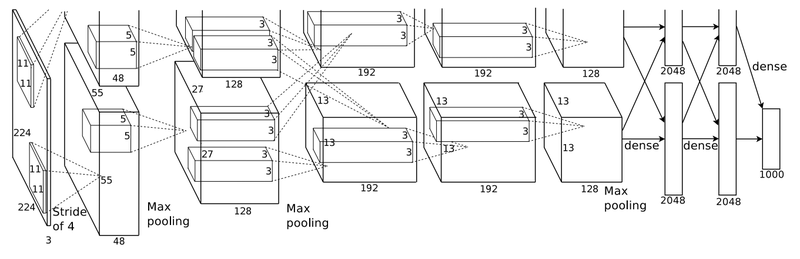

### 🌿 AlexNet
Supervision 팀이 오류율을 전년도 대비 10%까지 낮출 수 있었던 이유는 '네트워크를 깊게 쌓았기 때문'이다.
- AlexNet이란 이름은 논문의 1저자 이름에서 따왔다.
- 위 그림에서 잘린 부분은 GPU의 `병렬` 연산을 표현하기 위한 것이고, 레이어가 많을 뿐 MNIST에 CNN과 클래스가 많이 있는 네트워크라고 볼 수 있다.
- 여기에 ReLU 활성화 함수, 드롭아웃(Dropout), 오버래핑 풀링(Overlapping pooling) 등이 적용된 것
<br/>

- [참조 블로그](https://bskyvision.com/421)
- 5개의 conv 레이어, 3개의 FC레이어
- 2, 4, 5번째 conv 레이어는 전 단계의 같은 채널의 특성맵들과만 연결, 3번째 conv 레이어는 전 단계의 두 채널의 특성맵들과 모두 연결되어 있음
<br/>

가장 깊은 레이어를 사용하는 AlexNet은
- 7개의 CNN, 2개의 FCN을 사용

## 3. CNN을 잘 쓰자
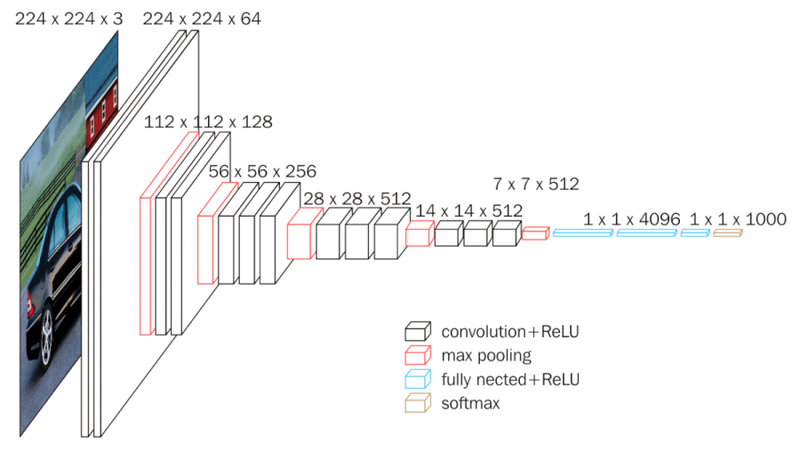

### 🌿 VGG
- AlexNet과 같이 이미지넷 챌린지에 공개된 모델
- 2014년 이미지넷 챌린지 준우승
- 간결한 구조로 많은 활용이 이루어짐
    - 이전의 우승 네트워크들이 10개가 안 되는 CNN층을 가진 반면
    - VGG16, VGG19 이름처럼 16, 19개의 층으로 이루어짐
    
<br/>
- CNN을 만들 때는 커널 크기(kernel size)를 조절하는데, VGG에서는 3x3 커널을 사용해 더 많은 레이어를 쌓고 이미지의 비선형적 특성을 더 잘 잡아낼 수 있다.
- 네트워크의 깊이(depth)가 어떤 영향을 주는지 연구하기 위해 설계된 network
- 그래서 conv kernel 사이즈를 하나로 정하고 convolution의 개수를 늘리는 방식으로 테스트를 진행
- 5x5 커널 1개와 3x3 커널 3개가 비슷한 연산 수를 유지하므로 3x3를 이용

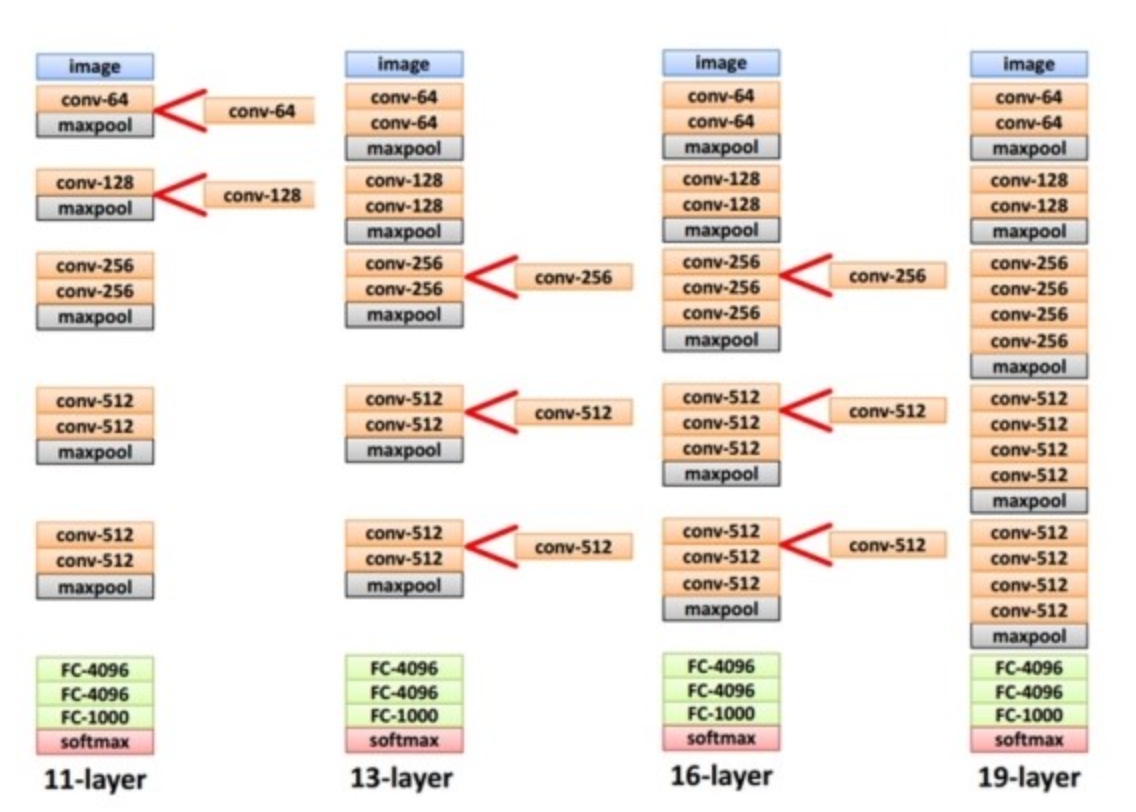

(출처: https://m.blog.naver.com/laonple/221259295035)

- 이렇게 VGGNet은 간단한 구조로 좋은 성능을 보여준다는 이유로 1위를 차지한 GoogleNet보다 많은 network에서 응용되고 있다.
- GoogleNet은 22개의 layer을 가지고 VGG16은 16개의 레이얼르 가진다.
- VGG는 간결하게 레이어를 쌓는 반면, GoogleNet은 Inception block을 도입해 다양한 기법을 사용하도록 사고를 확장

## 4. 멀리 있으면 잘 안 들려요
### Vanishing gradient
- [참조 블로그](http://cbjsena.blogspot.com/2018/12/blog-post_25.html)
- 모델은 깊어질수록 모델 학습을 위한 gradient가 소실되는 문제가 발생한다.
- 우리 네트워크는 gradient descent를 통해 기울기를 학습하는데, 깊은 레이어에서는 데이터에 따른 차이가 충분하게 반영되지 않아 gradient가 작아져 레이어를 학습시키기 위해 충분한 값을 표현하지 못한다.
- 이 경우 vanshing 되었다 표현해 **기울기 소실(Vanishing Gradient)** 라고 한다.
- 그 반대: Exploding Gradients
<br/>

- 이렇게 Gradient가 사라져 깊은 레이어가 적절히 학습되지 않는 문제를 해결하기 위해 ResNet은 새로운 방법을 도입했다.

## 5. 지름길을 만들어주자
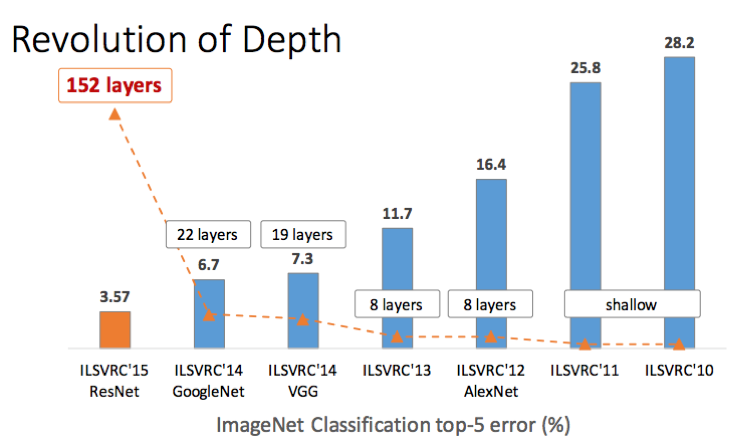

- 위는 이미지넷 챌린지의 역대 모델들의 레이어 수와 오류율(error rate)의 그래프
- 아래는 VGG19와 ResNet34의 네트워크 구조를 비교한 그림
    - ResNet은 VGG보다 확연히 레이어 수가 많다.
    - 가운데 Plain ResNet과 오른쪽 Residual ResNet을 보면 ResNet에서 Residual Model에서 보이는 것처럼 **Skip Connection** 구조를 사용해 Vanishing Gradient 문제를 해결했다.

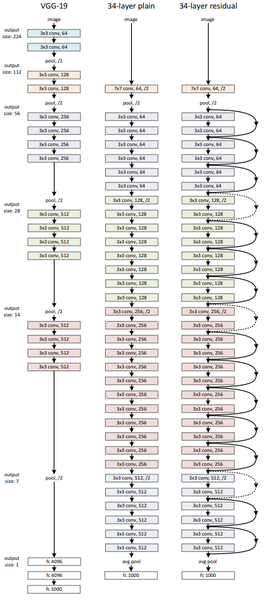



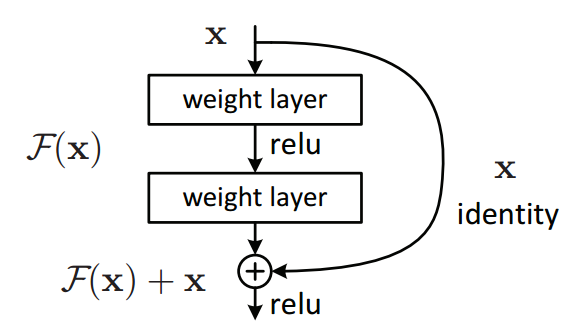

**Skip Connection**은 레이어의 입력을 다른 곳에 이어서 Gradient가 깊은 곳까지 이어지도록 함
- 하나의 layer의 output을 몇 개의 layer를 건너 뛰고 다음 layer의 input에 추가하는 것
- 위 그림처럼 레이어와 Skip Connection이 있는 블록을 Residual Block이라고 함

## 6. Model API
- 우리가 봐왔던 모델이 TensorFlow의 model API와 Keras에서 어떻게 구현되었는지 모델 구조와 비교하며 코드를 확인해보자.
- 초기 Tensorflow와 Keras는 포함 관계가 없었다. Tensorflow를 편하게 사용할 수 있도록 만든 것이 Keras였지만 Tensorflow 말고도 다른 인공지능 라이브러리를 편하게 사용할 수 있도록 만들어졌다.
- 이후 Keras 창시자가 구글에 합류하고, Tensorflow 1.2부터 tf.keras를 직접 지원하며 Tensorflow가 Keras를 포함한 형태를 보이게 되었다.

### Tensorflow
- Tenslorflow의 사전 학습 모델(pre-trained model)들은 slim이라는 고수준 API로 구현되어 있다.
- TF-Slim: 저수준의 텐서플로우 API를 간편하게 사용할 수 있는 고수준 경량 API로써, 텐서플로우 저수준 API를 사용해 모델을 정의, 학습, 평가하는 과정을 간소화 한다.

### Keras
- Keras applications을 통해 사전학습 모델을 제공한다.
- [VGG-16](https://github.com/keras-team/keras-applications/blob/master/keras_applications/vgg16.py)
- [ResNet-50](https://github.com/keras-team/keras-applications/blob/master/keras_applications/resnet50.py)

## 8. VGG-16

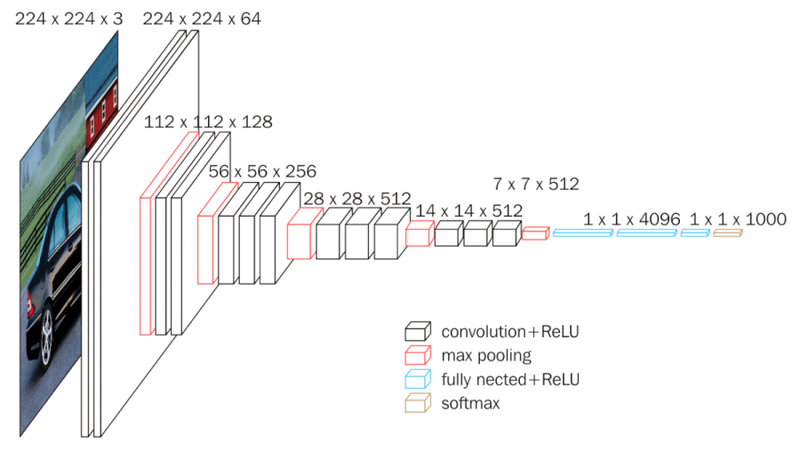

- Max pooling과 softmax 등의 활성화 함수를 제외하면 CNN계층과 FC계층을 합쳐 16개의 레이어로 구성이 되어 있다.
- 지금까지 우리가 만든 MNIST나 CIFAR100 이미지셋 분류기의 모델을 VGG로 바꿔보자.

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# CIFAR100 데이터셋을 가져온다.
cifar100 = keras.datasets.cifar100

(x_train, y_train), (x_test, y_test) = cifar100.load_data()
x_train, x_test = x_train/255.0, x_test/255.0 # 0-1 정규화

print("x_train: ", len(x_train), "x_test: ", len(x_test))

x_train:  50000 x_test:  10000


In [2]:
print(x_train.shape, x_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


- Convolution Neural Network

In [3]:
img_input = keras.Input(shape=(32, 32, 3))

x = keras.layers.Conv2D(16, 3, activation='relu')(img_input)
x = keras.layers.MaxPool2D((2, 2))(x)
x = keras.layers.Conv2D(32, 3, activation='relu')(x)
x = keras.layers.MaxPool2D((2, 2))(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(256, activation='relu')(x)
predictions = keras.layers.Dense(100, activation='softmax')(x)

model = keras.Model(inputs=img_input, outputs=predictions)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               295168

In [4]:
# 모델 학습!! 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=1)    # 1 Epoch만 학습합니다.

1563/1563 [==============================] - 8s 3ms/step - loss: 3.6759 - accuracy: 0.1457


- 위 코드의 model 부분을 VGG16로 바꿔보자. [참조](https://github.com/keras-team/keras-applications/blob/master/keras_applications/vgg16.py)

1. 첫 번째 블록 (첫 번째 max pooling까지)
2. 두 번째 블록 (두 번째 max pooling까지)
3. 세 번째 블록 (세 번째 max pooling까지)
4. 네 번째 블록 (네 번째 max pooling까지)
5. 다섯 번째 블록 (다섯 번째 max pooling까지)
6. 여섯 번째 블록 (완전 연결 계층 + softmax까지)

In [5]:
# 첫 번째 블록
x = layers.Conv2D(64, (3, 3), # 필터, 커널
                  activation='relu', # 주로 은닉층에 쓰임
                  padding='same', # 출력 이미지 사이즈가 입력 이미지 사이즈와 같음
                  name='block1_conv1')(img_input)
x = layers.Conv2D(64, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block1_conv2')(x)
x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

print('첫 번째 블록 ok')

첫 번째 블록 ok


In [6]:
# 두 번째 블록

x = layers.Conv2D(128, (3, 3),
                 activation='relu',
                 padding='same',
                 name='block2_conv1')(x)
x = layers.Conv2D(128, (3, 3),
                 activation='relu',
                 padding='same',
                 name='block2_conv2')(x)
x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

print('두 번째 블록 ok')

두 번째 블록 ok


In [7]:
# 세 번째 블록

x = layers.Conv2D(256, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block3_conv1')(x)
x = layers.Conv2D(256, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block3_conv2')(x)
x = layers.Conv2D(256, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block3_conv3')(x)
x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

print('세 번째 블록 ok')

세 번째 블록 ok


In [8]:
# 네 번째 블록

x = layers.Conv2D(512, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block4_conv1')(x)
x = layers.Conv2D(512, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block4_conv2')(x)
x = layers.Conv2D(512, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block4_conv3')(x)
x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

print('네 번째 블록 ok')

네 번째 블록 ok


In [9]:
# 다섯 번째 블록

x = layers.Conv2D(512, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block5_conv1')(x)
x = layers.Conv2D(512, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block5_conv2')(x)
x = layers.Conv2D(512, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block5_conv3')(x)
x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)

print('다섯 번째 블록 ok')

다섯 번째 블록 ok


In [10]:
# 여섯 번째 블록
# [Keras VGG16 코드 구현] 링크의 if include_top: 부분을 유심히 보세요 

x = layers.Flatten(name='flatten')(x)
x = layers.Dense(4096, activation='relu', name='fc1')(x)
x = layers.Dense(4096, activation='relu', name='fc2')(x)

print('여섯 번째 블록 ok')

classes=100
x = layers.Dense(classes, activation='softmax', name='predictions')(x) # CIFAR100을 위한 모델 Output

여섯 번째 블록 ok


- 위에서 쌓은 VGG 레이어를 실제 model로 만들어보자.

In [11]:
model = keras.Model(name="VGG-16", inputs=img_input, outputs=x)

model.summary()

Model: "VGG-16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0    

- 학습 파라미터 크기가 34M이나 된다.
- 위에서 만든 Conv Neural Network에 비해 100배가 넘어가는 크기

In [12]:
# 모델 학습!! 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=1)    # 1 Epoch만 학습합니다.

1563/1563 [==============================] - 50s 31ms/step - loss: 4.6061 - accuracy: 0.0095


- 34M의 파라미터를 가지는 VGG16은 1 epoch 정도로는 어림도 없을 것이다.

## 9. ResNet-50
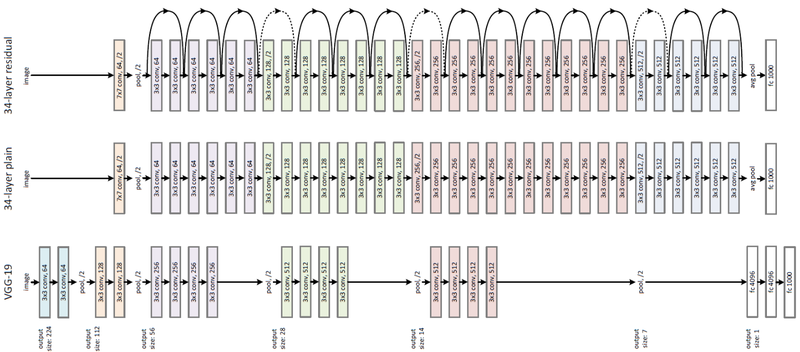

**Skip Connection**이 추가된 `RestNet`
- 레이어 수가 많아졌는데 이전 `VGG`와 어떤 점이 다르게 구현되었는지 확인해보자.
- 위 그림을 보면 `ResNet`에 서로 다른 색깔의 블록들이 있는데, 이는 블록마다 feature의 크기가 다르기 때문이다. 위와 같이 4개의 stage로 구분해 생각할 수 있는데, 같은 stage에선 kernel 크기와 channel 수가 동일하다. 이런 블록들은 하나씩 짜지 않고 블록 단위로 생성한다.
- [Keras ResNet50 코드 구현](https://git.dst.etit.tu-chemnitz.de/external/tf-models/-/blob/1d057dfc32f515a63ab1e23fd72052ab2a954952/official/vision/image_classification/resnet_model.py)으로부터 모델 구현 부분 가져오기
- `restnet50()` 함수를 이용하면 모델까지 깔끔히 생성해준다.
- 코드를 보면 ResNet50 모델을 생성하기 위해 반복적으로 사용하는 `conv_block`과 `identity_block`이 있다. 이 블록 구조를 활용해 50개가 되는 복잡한 레이어 구조를 간결히 표현하는 걸 확인할 수 있다.
- 데이터셋: CIFAR100

In [13]:
# 추가로 import해야 할 패키지들을 먼저 가져옵니다. 
from tensorflow.keras import backend, regularizers, initializers, models

# block 안에 반복적으로 활용되는 L2 regularizer를 선언해 줍니다.
def _gen_l2_regularizer(use_l2_regularizer=True, l2_weight_decay=1e-4):
    return regularizers.l2(l2_weight_decay) if use_l2_regularizer else None

print('Resnet50 GoGo!!')

Resnet50 GoGo!!


- 반복해 활용되는 `conv_block`과 `identitiy_block` 가져오기

In [14]:
def conv_block(input_tensor,
               kernel_size,
               filters,
               stage,
               block,
               strides=(2, 2),
               use_l2_regularizer=True,
               batch_norm_decay=0.9,
               batch_norm_epsilon=1e-5):
# [[YOUR CODE]]
    filters1, filters2, filters3 = filters
    
    if backend.image_data_format() == 'channels_last':
        bn_axis = 3
        
    else:
        bn_axis = 1
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
        
    x = layers.Conv2D(
        filters1, (1, 1),
        use_bias=False,
        kernel_initializer='he_normal',
        kernel_regularizer=_gen_l2_regularizer(use_l2_regularizer),
        name=conv_name_base + '2a')(
            input_tensor)
    x = layers.BatchNormalization(
      axis=bn_axis,
      momentum=batch_norm_decay,
      epsilon=batch_norm_epsilon,
      name=bn_name_base + '2a')(
    x)
    
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(
      filters2,
      kernel_size,
      strides=strides,
      padding='same',
      use_bias=False,
      kernel_initializer='he_normal',
      kernel_regularizer=_gen_l2_regularizer(use_l2_regularizer),
      name=conv_name_base + '2b')(
          x)
    x = layers.BatchNormalization(
      axis=bn_axis,
      momentum=batch_norm_decay,
      epsilon=batch_norm_epsilon,
      name=bn_name_base + '2b')(
          x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(
      filters3, (1, 1),
      use_bias=False,
      kernel_initializer='he_normal',
      kernel_regularizer=_gen_l2_regularizer(use_l2_regularizer),
      name=conv_name_base + '2c')(
          x)
    x = layers.BatchNormalization(
      axis=bn_axis,
      momentum=batch_norm_decay,
      epsilon=batch_norm_epsilon,
      name=bn_name_base + '2c')(
          x)

    shortcut = layers.Conv2D(
      filters3, (1, 1),
      strides=strides,
      use_bias=False,
      kernel_initializer='he_normal',
      kernel_regularizer=_gen_l2_regularizer(use_l2_regularizer),
      name=conv_name_base + '1')(
          input_tensor)
    shortcut = layers.BatchNormalization(
      axis=bn_axis,
      momentum=batch_norm_decay,
      epsilon=batch_norm_epsilon,
      name=bn_name_base + '1')(
          shortcut)

    x = layers.add([x, shortcut])
    x = layers.Activation('relu')(x)
    
    return x

In [15]:
def identity_block(input_tensor,
                   kernel_size,
                   filters,
                   stage,
                   block,
                   use_l2_regularizer=True):
    
    """
      The identity block is the block that has no conv layer at shortcut.

      Args:
        input_tensor: input tensor
        kernel_size: default 3, the kernel size of middle conv layer at main path
        filters: list of integers, the filters of 3 conv layer at main path
        stage: integer, current stage label, used for generating layer names
        block: 'a','b'..., current block label, used for generating layer names
        use_l2_regularizer: whether to use L2 regularizer on Conv layer.

      Returns:
        Output tensor for the block.
    """
    
    filters1, filters2, filters3 = filters
    if backend.image_data_format() == 'channels_last':
        bn_axis = 3
    else:
        bn_axis = 1
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    x = layers.Conv2D(
      filters1, (1, 1),
      use_bias=False,
      kernel_initializer='he_normal',
      kernel_regularizer=_gen_l2_regularizer(use_l2_regularizer),
      name=conv_name_base + '2a')(
          input_tensor)
    x = layers.BatchNormalization(
      axis=bn_axis,
      momentum=BATCH_NORM_DECAY,
      epsilon=BATCH_NORM_EPSILON,
      name=bn_name_base + '2a')(
          x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(
      filters2,
      kernel_size,
      padding='same',
      use_bias=False,
      kernel_initializer='he_normal',
      kernel_regularizer=_gen_l2_regularizer(use_l2_regularizer),
      name=conv_name_base + '2b')(
          x)
    x = layers.BatchNormalization(
      axis=bn_axis,
      momentum=BATCH_NORM_DECAY,
      epsilon=BATCH_NORM_EPSILON,
      name=bn_name_base + '2b')(
          x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(
      filters3, (1, 1),
      use_bias=False,
      kernel_initializer='he_normal',
      kernel_regularizer=_gen_l2_regularizer(use_l2_regularizer),
      name=conv_name_base + '2c')(
          x)
    x = layers.BatchNormalization(
      axis=bn_axis,
      momentum=BATCH_NORM_DECAY,
      epsilon=BATCH_NORM_EPSILON,
      name=bn_name_base + '2c')(
          x)

    x = layers.add([x, input_tensor])
    x = layers.Activation('relu')(x)
    
    return x


- resnet50 모델을 생성하는 함수 안에 Imagenet 데이터셋에 해당하는 input shape가 `input_shape=(224, 224, 3)`으로 선언되어 있음
- but, 우린 CIFAR100 데이터를 다루기 떄문에 `input_shape=(32, 32, 3)`이어야 한다.

In [16]:
def resnet50(num_classes,
             batch_size=None,
             use_l2_regularizer=True):
    """
  Instantiates the ResNet50 architecture.

  Args:
    num_classes: `int` number of classes for image classification.
    batch_size: Size of the batches for each step.
    use_l2_regularizer: whether to use L2 regularizer on Conv/Dense layer.

  Returns:
      A Keras model instance.
    """
    input_shape = (32, 32, 3)
    img_input = layers.Input(shape=input_shape, batch_size=batch_size)

    if backend.image_data_format() == 'channels_first':
        x = layers.Lambda(
            lambda x: backend.permute_dimensions(x, (0, 3, 1, 2)),
            name='transpose')(
                img_input)
        bn_axis = 1
    else:  # channels_last
        x = img_input
        bn_axis = 3

    x = layers.ZeroPadding2D(padding=(3, 3), name='conv1_pad')(x)
    x = layers.Conv2D(
      64, (7, 7),
      strides=(2, 2),
      padding='valid',
      use_bias=False,
      kernel_initializer='he_normal',
      kernel_regularizer=_gen_l2_regularizer(use_l2_regularizer),
      name='conv1')(
          x)
    x = layers.BatchNormalization(
      axis=bn_axis,
      momentum=BATCH_NORM_DECAY,
      epsilon=BATCH_NORM_EPSILON,
      name='bn_conv1')(
          x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    x = conv_block(
      x,
      3, [64, 64, 256],
      stage=2,
      block='a',
      strides=(1, 1),
      use_l2_regularizer=use_l2_regularizer)
    x = identity_block(
      x,
      3, [64, 64, 256],
      stage=2,
      block='b',
      use_l2_regularizer=use_l2_regularizer)
    x = identity_block(
      x,
      3, [64, 64, 256],
      stage=2,
      block='c',
      use_l2_regularizer=use_l2_regularizer)

    x = conv_block(
      x,
      3, [128, 128, 512],
      stage=3,
      block='a',
      use_l2_regularizer=use_l2_regularizer)
    x = identity_block(
      x,
      3, [128, 128, 512],
      stage=3,
      block='b',
      use_l2_regularizer=use_l2_regularizer)
    x = identity_block(
      x,
      3, [128, 128, 512],
      stage=3,
      block='c',
      use_l2_regularizer=use_l2_regularizer)
    x = identity_block(
      x,
      3, [128, 128, 512],
      stage=3,
      block='d',
      use_l2_regularizer=use_l2_regularizer)

    x = conv_block(
      x,
      3, [256, 256, 1024],
      stage=4,
      block='a',
      use_l2_regularizer=use_l2_regularizer)
    x = identity_block(
      x,
      3, [256, 256, 1024],
      stage=4,
      block='b',
      use_l2_regularizer=use_l2_regularizer)
    x = identity_block(
      x,
      3, [256, 256, 1024],
      stage=4,
      block='c',
      use_l2_regularizer=use_l2_regularizer)
    x = identity_block(
      x,
      3, [256, 256, 1024],
      stage=4,
      block='d',
      use_l2_regularizer=use_l2_regularizer)
    x = identity_block(
      x,
      3, [256, 256, 1024],
      stage=4,
      block='e',
      use_l2_regularizer=use_l2_regularizer)
    x = identity_block(
      x,
      3, [256, 256, 1024],
      stage=4,
      block='f',
      use_l2_regularizer=use_l2_regularizer)

    x = conv_block(
      x,
      3, [512, 512, 2048],
      stage=5,
      block='a',
      use_l2_regularizer=use_l2_regularizer)
    x = identity_block(
      x,
      3, [512, 512, 2048],
      stage=5,
      block='b',
      use_l2_regularizer=use_l2_regularizer)
    x = identity_block(
      x,
      3, [512, 512, 2048],
      stage=5,
      block='c',
      use_l2_regularizer=use_l2_regularizer)

    rm_axes = [1, 2] if backend.image_data_format() == 'channels_last' else [2, 3]
    x = layers.Lambda(lambda x: backend.mean(x, rm_axes), name='reduce_mean')(x)
    x = layers.Dense(
      num_classes,
      kernel_initializer=initializers.RandomNormal(stddev=0.01),
      kernel_regularizer=_gen_l2_regularizer(use_l2_regularizer),
      bias_regularizer=_gen_l2_regularizer(use_l2_regularizer),
      name='fc1000')(
          x)

    # A softmax that is followed by the model loss must be done cannot be done
    # in float16 due to numeric issues. So we pass dtype=float32.
    x = layers.Activation('softmax', dtype='float32')(x)

    # Create model.
    return models.Model(img_input, x, name='resnet50')


In [17]:
model = resnet50(num_classes=100)

model.summary()

NameError: name 'BATCH_NORM_DECAY' is not defined

- 학습 파라미터가 24M이 안 된다.
- VGG16보다 레이어 수는 훨씬 많지만 모델의 크기는 오히려 10M 정도 작은 걸 확인할 수 있다.

In [ ]:
# 모델 학습!! 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=1)    # 1 Epoch만 학습합니다.

- VGG-16보다 loss와 accuracy가 개선됨
- 처음부터 이렇게 안정되게 학습이 진행되는 것이 Resnet 구조의 장점!

**Skip Connection**
- conv_block
> x = layers.add([x, shortcut])

- identity_block
> x = layers.add([x, input_tensor])